# Гармонические функции

Эта функция, которая удовлетворяет двум условиям:
1. Функция должна быть дважды непрерывно дифференцируема по каждой из переменных
2. Вторая смешанная производная функции по каждой переменной должна равняться нулю

В контексте математического анализа и теории дифференциальных уравнений гармонические функции обладают рядом важных свойств:

**Линейность:**

Если $u$ и $v$ — гармонические функции, то их линейная комбинация 
$au+bv$ (где $a$ и $b$ — константы) тоже является гармонической функцией.

**Среднее значение:**

Значение гармонической функции в любой точке равно среднему значению этой функции на любой сфере, центр которой находится в этой точке. Это свойство также известно как свойство средней ценности.

**Максимальное и минимальное значения:** 

Гармонические функции не могут иметь локальных максимумов или минимумов внутри области определения, если они не являются константами (свойство, известное как принцип максимума).
Эти свойства делают гармонические функции важным инструментом в теории потенциала, физике, инженерии и других прикладных науках.

## Пример 1: Потенциал между двумя заряженными пластинами

Рассмотрим две параллельные бесконечно длинные пластины, заряженные с плотностью заряда $\sigma$ и находящиеся на расстоянии 
$d$ друг от друга. Пусть потенциал одной пластины равен $\phi_1$, а другой — $\phi_2$.
Тогда решение уравнения Лапласа между пластинами (при условии, что электрическое поле однородное) будет линейной функцией:

$$\phi(x)=\frac{\phi_2-\phi_1}{d}x+\phi_1$$ 

1. Так как функция линейна относительно $x$, то ее можно дифференцировать сколько угодно раз, а значит удовлетворяет первому условию
2. Проверка уравления Лапласа:

$$\varDelta\phi=\frac{∂^2\phi}{∂x^2}+\frac{∂^2\phi}{∂y^2}=0$$

$\quad$Посчитаем частные производные функции 
$\phi(x, y)$
$$\text{Первая производная по x:}\quad\frac{∂\phi}{∂x}=\frac{\phi_2-\phi_1}{d}\text{, вторая производная равна}\space0$$
$$\text{Первая, вторая производная по y равна:}\space0\text{, так как функция не зависит от }y$$

$\quad\varDelta\phi=0+0=0$, а значит, функция удовлетворяет уравнению Лапласа

Следовательно, функция потенциала между двумя заряженными пластинами является гармонической.  

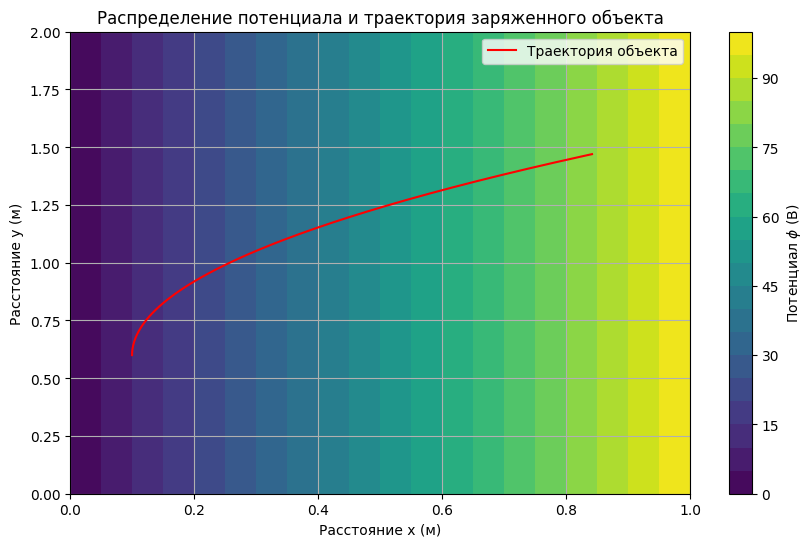

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Параметры задачи
phi1 = 0      # Потенциал первой пластины (В)
phi2 = 100    # Потенциал второй пластины (В)
d = 1         # Расстояние между пластинами (м)
L = 2         # Длина пластин по оси y (м)

# Параметры заряженного объекта
q = 1.6e-19   # Заряд объекта (Кл)
m = 9.1e-31   # Масса объекта (кг)
dt = 1e-9     # Шаг по времени (с)
t_max = 2.9e-7  # Максимальное время симуляции (с)
v0_y = 3e6    # Начальная скорость по y (м/с)

# Создание сетки точек
x = np.linspace(0, d, 100)
y = np.linspace(0, L, 100)
X, Y = np.meshgrid(x, y)

# Вычисление потенциала в каждой точке сетки
phi = (phi2 - phi1) / d * X + phi1

# Вычисление электрического поля
E_x = np.gradient(phi, axis=1) / np.gradient(X, axis=1)
E_y = np.gradient(phi, axis=0) / np.gradient(Y, axis=0)

# Начальные условия для заряженного объекта
x_obj = 0.1 * d  # Начальная позиция объекта по x (м)
y_obj = 0.3 * L  # Начальная позиция объекта по y (м)
v_x = 0          # Начальная скорость по x (м/с)
v_y = v0_y       # Начальная скорость по y (м/с)

# Списки для хранения траектории объекта
trajectory_x = [x_obj]
trajectory_y = [y_obj]

# Симуляция движения объекта
for t in np.arange(0, t_max, dt):
    # Найти ближайший индекс для текущих координат
    i = (np.abs(x - x_obj)).argmin()
    j = (np.abs(y - y_obj)).argmin()

    # Рассчитать силу
    F_x = q * E_x[j, i]
    F_y = q * E_y[j, i]

    # Рассчитать ускорение
    a_x = F_x / m
    a_y = F_y / m

    # Обновить скорость
    v_x += a_x * dt
    v_y += a_y * dt

    # Обновить позицию
    x_obj += v_x * dt
    y_obj += v_y * dt

    # Записать траекторию
    trajectory_x.append(x_obj)
    trajectory_y.append(y_obj)

# Построение графика потенциала и траектории объекта
plt.figure(figsize=(10, 6))
contour = plt.contourf(X, Y, phi, 20, cmap='viridis')
plt.colorbar(contour, label='Потенциал $\phi$ (В)')
plt.plot(trajectory_x, trajectory_y, 'r-', label='Траектория объекта')
plt.xlabel('Расстояние x (м)')
plt.ylabel('Расстояние y (м)')
plt.title('Распределение потенциала и траектория заряженного объекта')
plt.legend()
plt.grid(True)
plt.show()

## Пример 2: Распределение температуры в пластине

Рассмотрим квадратную металлическую пластину размером $L×L$ с постоянными температурами на границах. Пусть температура на границах пластины задается следующим образом: левая, верхняя, нижняя границы $T=0$, а правая граница $T=100$

Температурное распределение в стационарном режиме можно найти с помощью уравнения теплопроводности, которое в двумерном случае имеет вид:

$$\frac{∂^2T}{∂x^2}+\frac{∂^2T}{∂y^2}=0$$

Это уравнение Лапласа для температуры $T(x, y)$, и его решения также являются гармоническими функциями.

**Решение уравнения Лапласа:**

Для решения уравнения Лапласа с указанными граничными условиями можно использовать метод сеток (метод конечных разностей). Суть метода заключается в замене производных конечными разностями и решении полученной системы линейных уравнений.

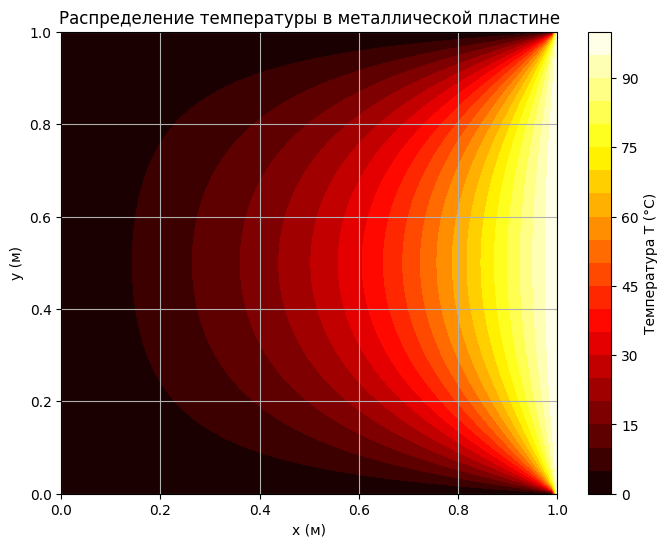

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Параметры задачи
L = 1.0  # Размер пластины (м)
N = 100  # Количество узлов сетки

# Создание сетки точек
x = np.linspace(0, L, N)
y = np.linspace(0, L, N)
X, Y = np.meshgrid(x, y)

# Инициализация температурного поля
T = np.zeros((N, N))

# Граничные условия
T[:, -1] = 100  # Верхняя граница

# Метод итераций для решения уравнения Лапласа
tolerance = 1e-4
max_iterations = 10000
for iteration in range(max_iterations):
    T_new = T.copy()
    T_new[1:-1, 1:-1] = 0.25 * (T[1:-1, :-2] + T[1:-1, 2:] + T[:-2, 1:-1] + T[2:, 1:-1])
    if np.max(np.abs(T_new - T)) < tolerance:
        print(f"Сошлось за {iteration} итераций.")
        break
    T = T_new

# Построение графика температурного распределения
plt.figure(figsize=(8, 6))
contour = plt.contourf(X, Y, T, 20, cmap='hot')
plt.colorbar(contour, label='Температура T (°C)')
plt.xlabel('x (м)')
plt.ylabel('y (м)')
plt.title('Распределение температуры в металлической пластине')
plt.grid(True)
plt.show()

## Пример 3: Потенциальное течение несжимаемой жидкости

Рассмотрим течение несжимаемой жидкости, которое описывается потенциальным течением. 
В потенциальном течении существует функция потенциала скорости $\phi$, такая что скорость 
жидкости $\mathbf{v}$ может быть выражена как градиент этой функции: $\mathbf{v} = \nabla \phi$

Для несжимаемой жидкости выполняется условие $\nabla \cdot \mathbf{v} = 0$, что в терминах функции $\phi$ превращается в уравнение Лапласа: 
$\mathbf{v} = \nabla^2 \phi$

Следовательно, функция $\phi$ является гармонической.

**Пример: Потенциальное течение вокруг цилиндра**

Рассмотрим потенциальное течение несжимаемой жидкости вокруг цилиндра радиусом $R$. Пусть ось цилиндра направлена вдоль оси $z$, а течение происходит в плоскости $xy$. Потенциальное течение может быть описано с помощью функции потенциала $\phi$:

$\phi(r, \theta)=U(r+\frac{R^2}{r})\space cos(\theta)$, где $U$ — скорость потока на бесконечности, $r$ и $\theta$ — полярные координаты.

Так как функция $\phi$ дважды непрерывно дифференцируема по $r$ и $\theta$, то она удовлетворяет первому условию гармонической функции.
Проверим уравнение Лапласа для функции $\phi$:
$$
\nabla^2\phi=
\frac{1}{r}\frac{∂}{∂r}
\left(r\frac{∂\phi}{∂r}\right)
+\frac{1}{r^2}\frac{∂^2\phi}{∂\theta^2}
$$

Посчитаем частные производные функции $\phi(r, \theta)$:

$$\frac{∂\phi}{∂r}=U\left(1-\frac{R^2}{r^2}\right)\space cos(\theta)$$
$$\frac{∂^2\phi}{∂r^2}=U\left(\frac{2R^2}{r^3}\right)\space cos(\theta)$$
$$\frac{∂\phi}{∂\theta}=-U\left(r+\frac{R^2}{r}\right)\space cos(\theta)$$
$$\frac{∂^2\phi}{∂\theta^2}=-U\left(r+\frac{R^2}{r}\right)\space cos(\theta)$$

Подставим эти выражения в уравнение Лапласа:

$$
\nabla^2\phi=
\frac{1}{r}\frac{∂}{∂r}
\left(rU \left(1-\frac{R^2}{r^2}\space \right) cos(\theta) \right)
+\frac{1}{r^2}\left( - U \left( r+\frac{R^2}{r} \right) \space cos(\theta) \right) =0
$$

Это подтверждает, что $\phi$ является гармонической функцией.
Теперь визуализируем потенциал $\phi$ и течение вокруг цилиндра.

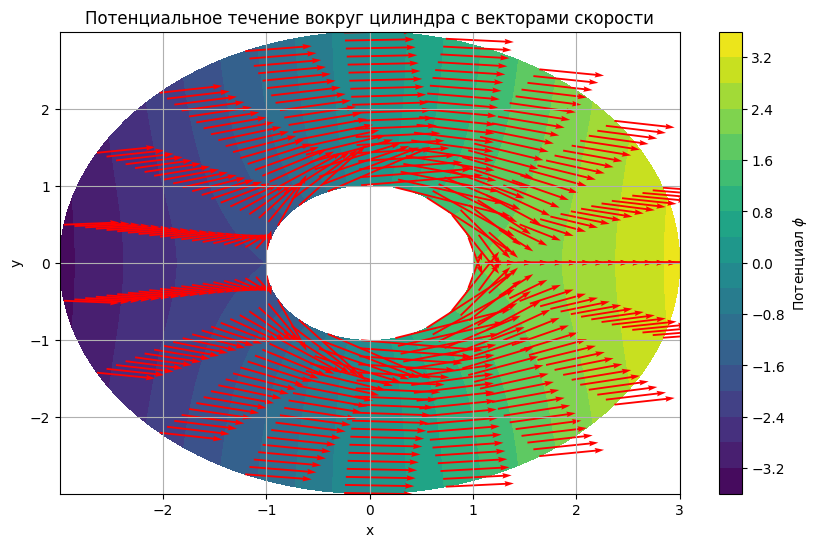

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Параметры задачи
U = 1       # Скорость потока на бесконечности
R = 1       # Радиус цилиндра

# Создание сетки точек для потенциала
r = np.linspace(1.01*R, 3*R, 100)  # Избегаем r = R, чтобы не делить на ноль
theta = np.linspace(0, 2*np.pi, 100)
R_grid, Theta_grid = np.meshgrid(r, theta)

# Вычисление потенциала в каждой точке сетки
Phi = U * (R_grid + R**2 / R_grid) * np.cos(Theta_grid)

# Создание сетки точек для векторов скорости (уменьшенное количество точек)
r_vec = np.linspace(1.01*R, 3*R, 20)
theta_vec = np.linspace(0, 2*np.pi, 20)
R_grid_vec, Theta_grid_vec = np.meshgrid(r_vec, theta_vec)

# Вычисление компонент скорости в полярных координатах
V_r = U * (1 - R**2 / R_grid_vec**2) * np.cos(Theta_grid_vec)
V_theta = -U * (1 + R**2 / R_grid_vec**2) * np.sin(Theta_grid_vec)

# Преобразование скоростей в декартовы координаты
V_x = V_r * np.cos(Theta_grid_vec) - V_theta * np.sin(Theta_grid_vec)
V_y = V_r * np.sin(Theta_grid_vec) + V_theta * np.cos(Theta_grid_vec)

# Преобразование координат в декартовы для визуализации
X_vec = R_grid_vec * np.cos(Theta_grid_vec)
Y_vec = R_grid_vec * np.sin(Theta_grid_vec)

# Преобразование координат потенциала в декартовы для визуализации
X = R_grid * np.cos(Theta_grid)
Y = R_grid * np.sin(Theta_grid)

# Построение графика потенциала и векторов скорости
plt.figure(figsize=(10, 6))
contour = plt.contourf(X, Y, Phi, 20, cmap='viridis')
plt.colorbar(contour, label='Потенциал $\phi$')
plt.quiver(X_vec, Y_vec, V_x, V_y, color='red', scale=10)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Потенциальное течение вокруг цилиндра с векторами скорости')
plt.grid(True)
plt.show()